<a href="https://colab.research.google.com/github/andrefsc/andrefsc_repository/blob/main/LangChain_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LangChain Series: Part 1.1 - Simple Prompting with LangChain

We'll start at a very foundational level, with how to prompt using LangChain.

We'll want to get a few patterns under our belt to allow us to understand some of the later pieces of LangChain's functionality.

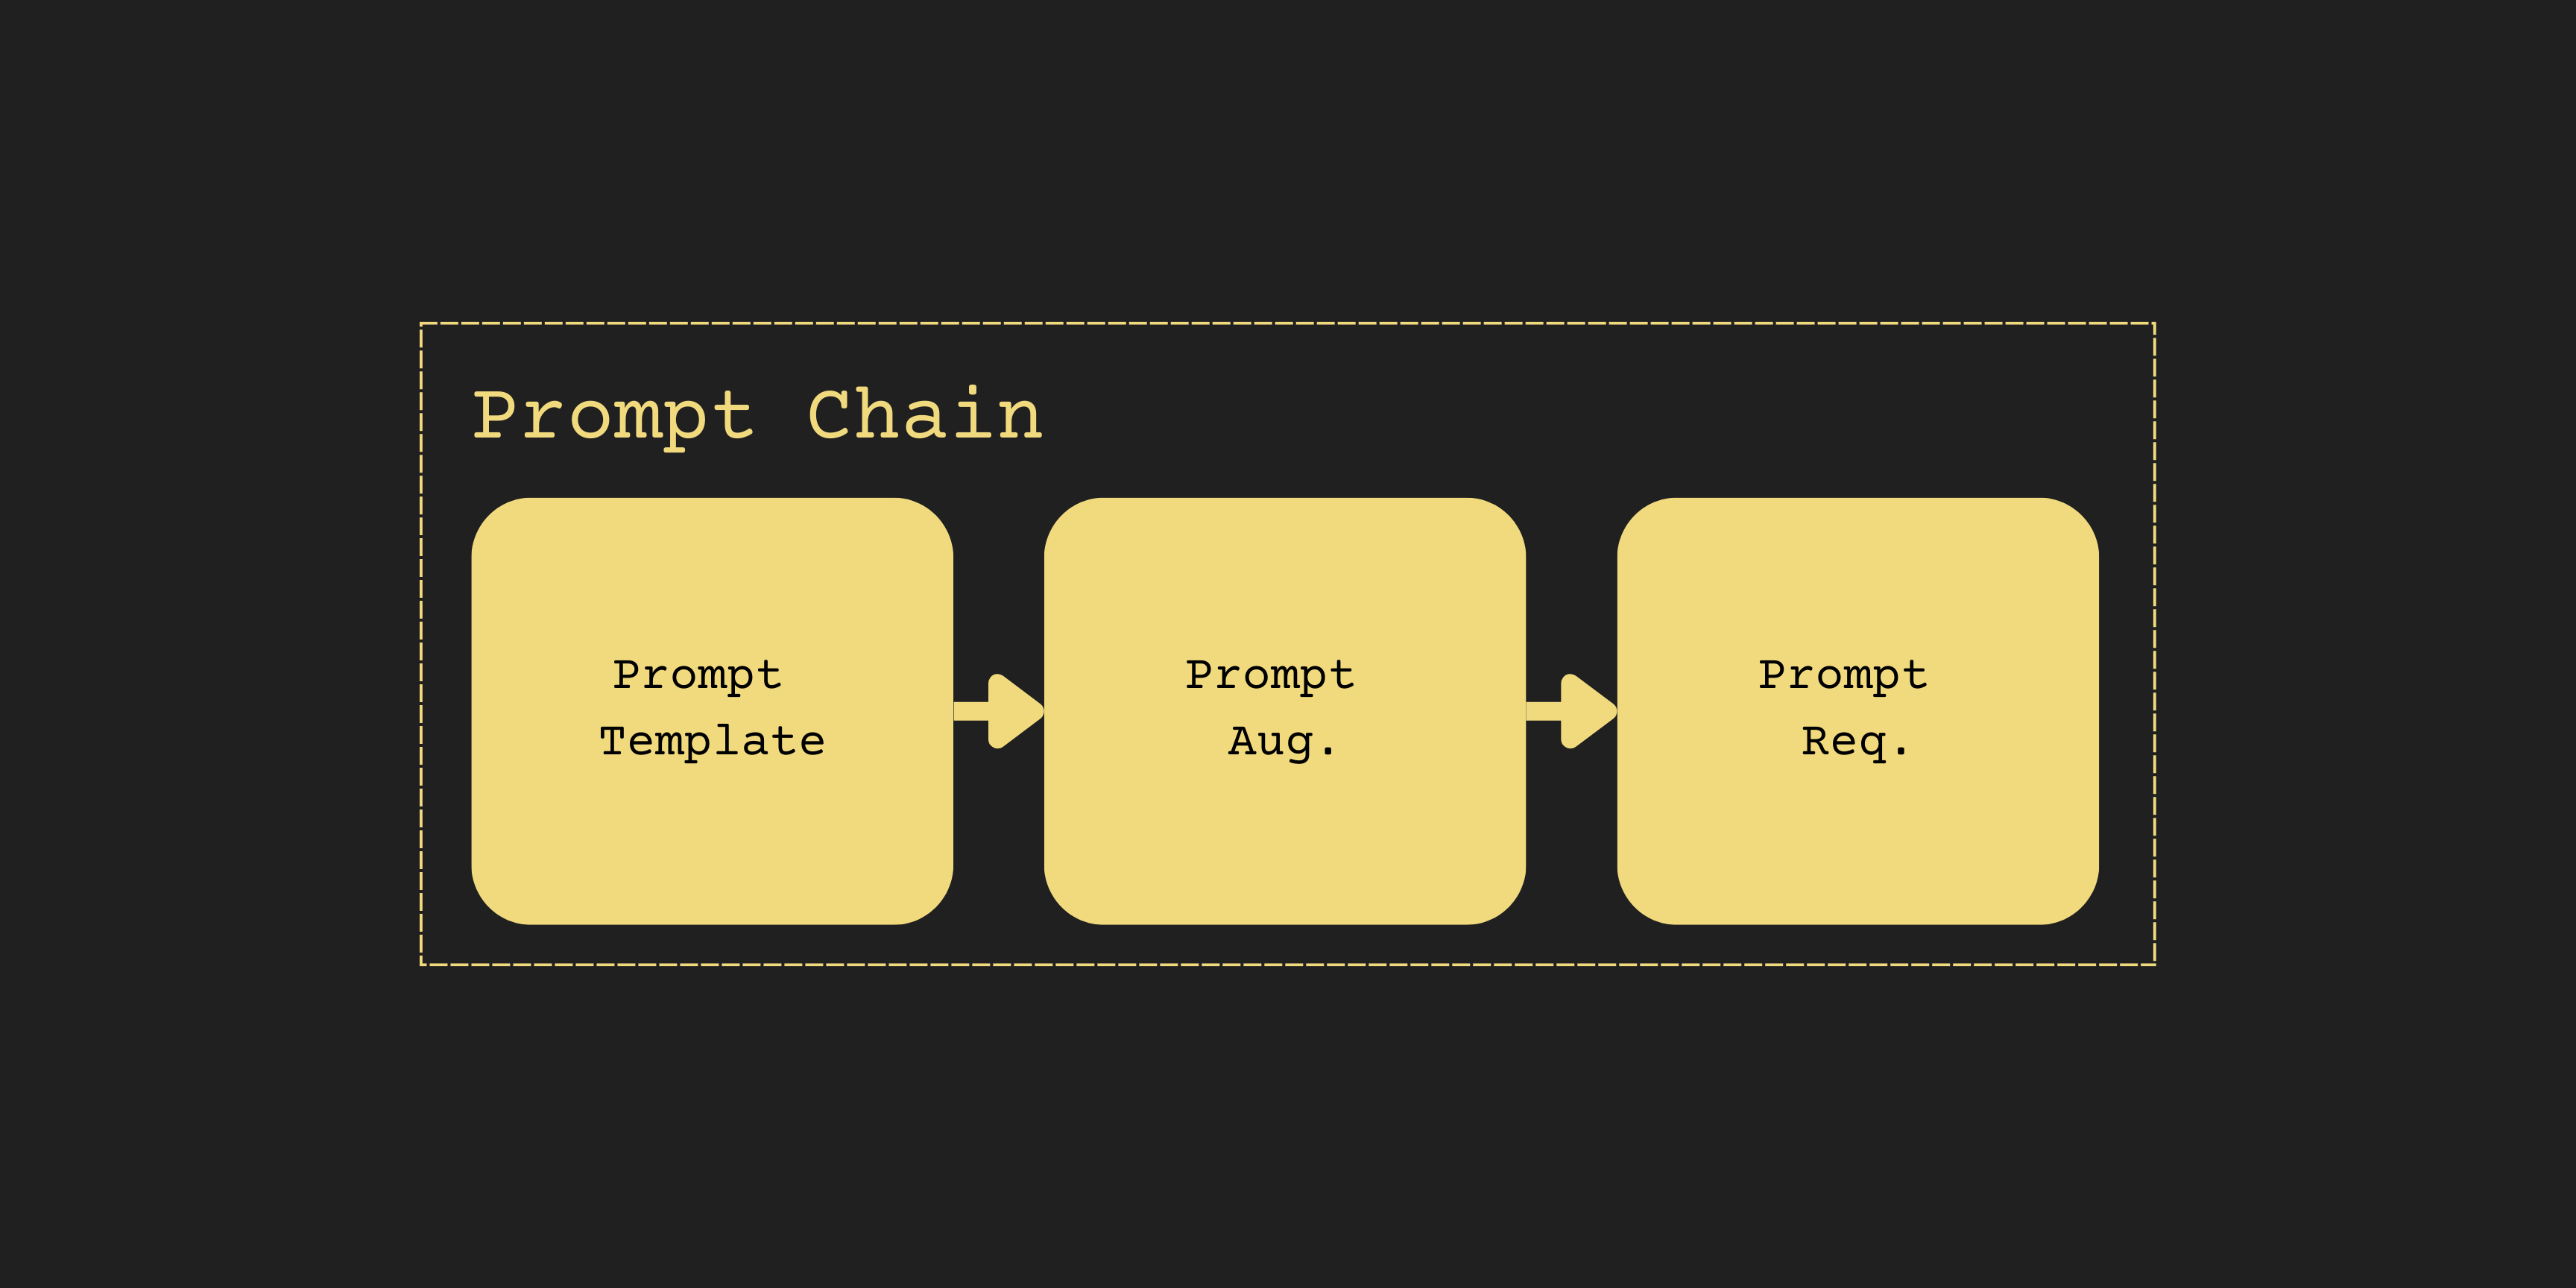

### Setting up our LLM

For this walkthrough we'll be using Falcon-7B-instruct as our base LLM. This is to keep things open-source and accessible. As you'll see, we'll also be using the free GPU environment from GCP.

Let's start by grabbing some dependencies.

In [1]:
!pip install -q -U transformers einops accelerate peft xformers langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Now we can load our model using Hugging Face's `transformers` library.

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    model_kwargs={"temperature" : 0, "max_length" : 128}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

We we can use LangChain's `HuggingFacePipeline` to load our local pipeline!

In [4]:
from langchain import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=pipeline)

### Prompt Templates

First things first, let's look at a simple prompt template.

In [6]:
from langchain import PromptTemplate

template = """
You are an expert in Python programming.
{query}
"""

prompt = PromptTemplate.from_template(template)

You can think of this prompt template in the following sense:

It is going to take some input (here we're using `query`} and it's going to format the template string to include that input.

Say our query was:

`"Write a function that determines the Nth Fibonacci number"`

When we format our template with that query we'll get:

```
You are an expert in Python programming.
Write a function that determines the Nth Fibonacci number
```

So let's try to format it with that exact query and see what our output is!

In [7]:
prompt.format(query="Write a function that determines the Nth Fibonacci number")

'\nYou are an expert in Python programming.\nWrite a function that determines the Nth Fibonacci number\n'

Perfect!

That's exactly what we expected to see!

Now let's check out an example with 2 inputs to see how we can start extending this idea to more complex prompts.

In [8]:
multi_input_template = """
You are an expert in {programming_language} programming.
{query}
"""

multi_input_prompt = PromptTemplate(input_variables=["programming_language", "query"], template=multi_input_template)

In [10]:
multi_input_prompt.format(programming_language="JavaScript", query="Write a function that determines the Nth Fibonacci number")

'\nYou are an expert in JavaScript programming.\nWrite a function that determines the Nth Fibonacci number\n'

And as you can see, it's really as easy as that to set up prompt templates. Your imagination is the only limit.

### Simple Chain

Now that we have our LLM and a prompt template, let's set up a simple chain that leverages Falcon-7B-instruct!

In [12]:
from langchain import LLMChain

llm_chain = LLMChain(prompt=multi_input_prompt, llm=llm)

programming_language = "Python"
query = "Write a function that determines the Nth Fibonacci number."

print(llm_chain.run({"programming_language" : programming_language, "query" : query}))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.



def Fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return Fibonacci(n - 1) + Fibonacci(n - 2)


Let's test it out and see how our open-source model did!

In [14]:
def Fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return Fibonacci(n - 1) + Fibonacci(n - 2)

Fibonacci(10)

55

Spot on!

Let's try another language and see if it holds up!

In [15]:
programming_language = "JavaScript"
query = "Write a function that determines the Nth Fibonacci number."

print(llm_chain.run({"programming_language" : programming_language, "query" : query}))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.



function Fibonacci(n) {
  if (n === 0 || n === 1) {
    return n;
  } else {
    return Fibonacci(n - 1) + Fibonacci(n - 2);
  }
}

console.log(Fibonacci(10)); // 55


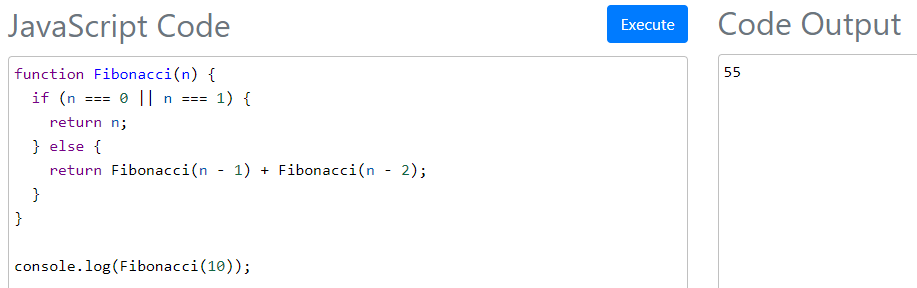

And again, we get the correct result!

### Conclusion

Getting started with LangChain and prompting is not nearly as daunting as you might think - in fact it's straightforward and can be done through Colab (or similar other lightweight compute resources) in a flash!

In the next installment of the series, we'll be looking at multiple-example prompting. Specifically we'll look at one-shot, few-shot, and selected few-shot examples!